<a href="https://colab.research.google.com/github/dooooing/2023-ESAA-/blob/main/0512_%EC%A0%9C%EC%B6%9C_%EA%B3%BC%EC%A0%9C_%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C_ch4_6~7%2C_10_pg_227~251%2C_278~289.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**파이썬 머신러닝 완벽가이드** p.227-251, 278-289

## 06. XGBoost(eXtra Gradient Boost)


---

**XGBoost** : 트리 기반의 앙상블 학습에서 가장 각광받고 있는 알고리즘

: GBM에 기반 -> GBM의 단점 해결해서 매우 각광

* XGBoost의 장점
  + 뛰어난 예측 성능 : 일반적으로 분류와 회귀 영역
  + GBM 대비 빠른 수행 시간 : by 병렬 수행 및 다양한 기능(일반적인 GBM에 비해 수행시간 빠른것. 다른 머신러닝 알고리즘에 비해 빠르다는 의미x)
  + 과적합 규제 : 자체에 과적합 규제 기능
  + Tree pruning(나무 가지치기) : max_depth 파라미터로 분할 깊이를 조정하기도 하지만, tree pruning으로 더 이상 긍정 이득이 없는 분할을 가지치기해서 분할 수를 더 줄이는 추가적인 장점
  + 자체 내장된 교차 검증 : 반복 수행 시마다 내부적으로 학습 데이터 세트와 평가 데이터 세트에 대한 교차 검증 수행(평가 값 최적화되면 조기 중단)
  + 결손값 자체 처리

XGBoost의 파이썬 패키지 = **xgboost**
 
 -> 파이썬 래퍼 XGBoost 모듈 + 사이킷런 래퍼 XGBoost 모듈(**XGBClassifier**와 **XGBRegressor**)

 -> 사이킷런 래퍼 XGBoost 모듈은 사이킷런의 다른 Estimator와 사용법 같지만, 파이썬 네이티브 XGBoost는 고유의 API와 하이퍼 파라미터 이용


In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

### 파이썬 래퍼 XGBoost 하이퍼 파라미터

XGBoost는 GBM과 유사한 하이퍼 파라미터

but 사이킷런 파라미터의 범용화된 이름 규칙에 따라 파라미터명 달라져 -> 파이썬, 사이킷런 래퍼 XGBoost 모듈 일부 하이퍼 파라미터 주의 필요

>1) 일반 파라미터 : 일반적으로 실행 시 스레드의 개수나 silent 모드 등의 선택을 위한 파라미터. 디폴트 파라미터 값을 바꾸는 경우 거의 x
 + booster : gbtree(tree based model) 또는 gblinear(linear model) 선택. 디폴트는 gbtree
 + silent : 디폴트 0. 출력 메세지를 나타내고 싶지 않을 경우 1로 설정
 + nthread : CPU의 실행 스레드 개수 조정. 디폴트는 CPU의 전체 스레드 다 사용하는 것. 
   - 멀티 코어/스레드 CPU 시스템에서 전체 CPU를 사용하지 않고 일부 CPU만 사용해 ML 애플리케이션을 구동하는 경우에 변경

>2) 부스터 파라미터 : 트리 최적화, 부스팅, regularization 등과 관련 파라미터 등을 지칭. 대부분의 하이퍼 파라미터.
 + eta [default=0.3, alias: learning_rate] : GBM의 학습률과 같은 파라미터. 0과 1 사이의 값 지정하며 부스팅 스텝을 반복적으로 수행할 때 업데이트되는 학습률 값.
   - 파이썬 래퍼 기반의 xgboost를 이용할 경우 디폴트는 0.3.
   - 사이킷런 래퍼 클래스 이용할 경우 eta는 learning_rate 파라미터로 대체. 디폴트는 0.1. 보통은 0.01~0.2 사이의 값 선호.
 + num_boost_rounds : GBM의 n_estimators와 같은 파라미터.
 + min_child_weight[default=1] : 트리에서 추가적으로 가지를 나눌지를 결정하기 위해 필요한 데이터들의 weight 총합.
   - min_child_weight이 클수록 분할 자제. 과적합 조절하기 위해 사용.
 + gamma [default=0, alias: min_split_loss] : 트리의 리프 노드를 추가적으로 나눌지를 결정할 최소 손실 감소 값
   - 해당 값보다 큰 손실이 감소된 경우에 리프 노드 분리. 값이 클수록 과적합 감소 효과.
 + max_depth[default=6] : 트리 기반 알고리즘의 max_depth와 같은 파라미터. 0을 지정하면 깊이에 제한x.
   - max_depth가 높으면 특정 피처 조건에 특화되어 룰 조건 만들어져 과적합 가능성 높아져. 보통은 3~10 사이의 값 적용.
 + sub_sample[default=1] : GBM의 subsample과 동일. 트리가 커져서 과적합되는 것을 제어하기 위해 데이터를 샘플링하는 비율 지정.
   - sub_sample=0.5로 지정하면 전체 데이터의 절반을 트리를 생성하는 데 사용. 0에서 1 사이의 값 가능하나 일반적으로 0.5~1 사이의 값 사용.
 + colsample_bytree[default=1] : GBM의 max_features와 유사.
   - 트리 생성에 필요한 피처(칼럼)를 임의로 샘플링하는 데 사용. 매우 많은 피처가 있는 경우 과적합을 조정하는 데 적용.
 + lambda [default=1, alias: reg_lambda] : L2 Regularization 적용 값.
   - 피처 개수가 많을 경우 적용 검토. 값이 클수록 과적합 감소 효과.
 + alpha [default=0, alias: reg_alpha] : L1 Regularization 적용 값.
   - 피처 개수가 많을 경우 적용 검토. 값이 클수록 과적합 감소 효과.
 + scale_pos_weight [default=1] : 특정 값으로 치우친 비대칭한 클래스로 구성된 데이터 세트의 균형을 유지하기 위한 파라미터.

>3) 학습 태스크 파라미터 : 학습 수행 시의 객체 함수, 평가를 위한 지표 등을 설정하는 파라미터
 + objective : 최솟값을 가져야할 손실 함수 정의.
   - 많은 유형의 손실함수 사용 가능. 이진 분류인지 다중 분류인지에 따라 손실함수 달라져.
 + binary:logistic : 이진 분류일 때 적용.
 + multi:softmax : 다중 분류일 때 적용.
   - 손실함수일 경우에는 레이블 클래스의 개수인 num_class 파라미터를 지정해야해
 + eval_metric : 검증에 사용되는 함수 정의. 기본값은 회귀인 경우는 rmse, 분류일 경우에는 error.
   - 유형 : rmse, mae, logloss, error, merror, mlogloss, auc

* 과적합 문제가 심각하다면?
  + eta 값 낮춘다.(0.01~0.1). eta 값을 낮출 경우 num_round(또는 n_estimators)는 반대로 높여줘야해.
  + max_depth 값 낮춘다.
  + min_child_weight 값 높인다.
  + gamma 값 높인다.
  + subsample과 colsample_bytree 조정

* XGBoost 기능
  + 자체적으로 교차 검증, 성능 평가, 피처 중요도 등의 시각화 기능 
  + 조기 중단 기능(n_estimators에 지정한 부스팅 반복 횟수에 도달하지 않더라도 예측 오류가 더 이상 개선되지 않으면 반복을 끝까지 수행하지 않고 중지해 수행 시간 개선)

In [ ]:
import xgboost

print(xgboost.__version__)

1.7.5


### 파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측

위스콘신 유방암 데이터 세트 : 종양의 크기, 모양 등의 다양한 속성값을 기반으로 악성 종양인지 양성 종양인지를 분류한 데이터 세트

종양 - 양성 종양과 악성 종양으로 구분. (양성 종양이 비교적 성장 속도 느리고 전이되지 않아)

=> 위스콘신 유방암 데이터 세트에 기반해 종양의 다양한 피처에 따라 악성종양인지 일반 양성종양인지를 XGBoost를 이용해 예측

xgboost 패키지는 피처의 중요도 시각화해주는 모듈인 **plot_importance** 함께 제공. 

사이킷런에서 위스콘신 유방암 데이터 세트 **load_breast_cancer()**로 호출

In [ ]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target'] = y_label
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


=> 종양의 크기와 모양에 관련된 많은 속성이 숫자형 값으로. 타킷 레이블 값의 종류는 악성인 'malignant'가 0 값으로, 양성인 'benign'이 1값으로

* 레이블 값의 분포

In [ ]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


=> 1값인 양성 benign이 357개, 0값인 악성 malignant가 212개로 구성.

* 전체 데이터 세트 중 80%를 학습용으로, 20%를 테스트용으로 분할.

In [ ]:
# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


* 파이썬 래퍼 XGBoost와 사이킷런과의 가장 큰 차이는 학습용과 테스트용 데이터 세트를 위해 별도의 객체인 **DMatrix**를 생성한다는 점.
  + DMatrix : 주로 넘파이 입력 파라미터를 받아서 만들어지는 XGBoost만의 전용 데이터 세트
    - 주요 입력 파라미터 : data(피처 데이터 세트), label(분류의 경우 레이블 데이터 세트, 회귀의 경우 숫자형인 종속값 데이터 세트)
    - 넘파이 외에 libsvm txt 포맷 파일, xgboost 이진 버퍼 파일을 파라미터로 입력받아 변환 가능

* 넘파이 형태의 학습 데이터 세트와 테스트 데이터 세트를 DMatrix로 변환



In [ ]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

* 하이퍼 파라미터 설정을 딕셔너리 형태로

In [ ]:
params = { 'max_depth' :3,
          'eta' :0.1,                              # XGBClassifier 사용할 경우 eta가 아니라 learning_rate
          'objective' :'binary:logistic',          # 0 또는 1 이진분류이므로 목적함수는 이진 로지스틱
          'eval_metric' :'logloss',
          'early_stoppings' :100
}
num_rounds = 400

* 지정된 하이퍼 파라미터로 XGBoost 모델 학습

파이썬 래퍼 XGBoost는 하이퍼 파라미터를 xgboost 모듈의 train() 함수에 파라미터로 전달

(<-> 사이킷런의 경우는 Estimator의 생성자를 하이퍼 파라미터로 전달)

* 조기 중단은 xgboost의 train() 함수에 **early_stopping_rounds** 파라미터 입력
  + 반드시 eval_set과 eval_metric 함께 설정돼야 해 
    - eval_set 는 성능 평가를 수행할 평가용 데이터 세트 설정
    - eval_metric 은 평가 세트에 적용할 성능 평가 방법. 분류일 경우는 주로 'error', 'logloss' 적용.
  + **evals** 파라미터에 학습 데이터 세트와 eval 데이터 세트 명기해야해

In [ ]:
# train 데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval'로 명기합니다.
wlist = [(dtrain, 'train'), (dtest, 'eval')]
# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, \
                      early_stopping_rounds=100, evals=wlist)

[17:30:15] WARNING: ../src/learner.cc:767: 
Parameters: { "early_stoppings" } are not used.

[0]	train-logloss:0.60969	eval-logloss:0.61352
[1]	train-logloss:0.54080	eval-logloss:0.54784
[2]	train-logloss:0.48375	eval-logloss:0.49425
[3]	train-logloss:0.43446	eval-logloss:0.44799
[4]	train-logloss:0.39055	eval-logloss:0.40911
[5]	train-logloss:0.35415	eval-logloss:0.37498
[6]	train-logloss:0.32122	eval-logloss:0.34571
[7]	train-logloss:0.29259	eval-logloss:0.32053
[8]	train-logloss:0.26747	eval-logloss:0.29721
[9]	train-logloss:0.24515	eval-logloss:0.27799
[10]	train-logloss:0.22569	eval-logloss:0.26030
[11]	train-logloss:0.20794	eval-logloss:0.24604
[12]	train-logloss:0.19218	eval-logloss:0.23156
[13]	train-logloss:0.17792	eval-logloss:0.22005
[14]	train-logloss:0.16522	eval-logloss:0.20857
[15]	train-logloss:0.15362	eval-logloss:0.19999
[16]	train-logloss:0.14333	eval-logloss:0.19012
[17]	train-logloss:0.13398	eval-logloss:0.18182
[18]	train-logloss:0.12560	eval-logloss:0.17473
[19]	

=> train-error와 eval_logloss가 지속적으로 감소

* 테스트 데이터 세트에 예측 수행

 유의할 점 : xgboost의 predict()는 예측 결괏값이 아닌 예측 결과를 추정할 수 있는 확률 값을 반환한다는 것.
 
 (-> 본 예제는 이진 분류이므로 0.5 기준으로 0,1 결정하는 로직 추가)

In [ ]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결괏값을 10개만 표시, 예측 확률값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 에측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [1 if x>0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:', preds[:10])

predict() 수행 결괏값을 10개만 표시, 예측 확률값으로 표시됨
[0.934 0.003 0.91  0.094 0.993 1.    1.    0.999 0.997 0.   ]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


* get_clf_eval() 함수 적용해 XGBoost 모델의 예측 성능 평가

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  # ROC-AUC 추가
  roc_auc = roc_auc_score(y_test, pred_proba)
  print('오차 행렬')
  print(confusion)
  # ROC-AUC print 추가
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
  F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
get_clf_eval(y_test, preds, pred_probs)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870,  F1: 0.9806, AUC:0.9951


=> 정확도는 약 0.9737, 정밀도는 0.9744, 재현율은 0.9870, F1-스코어는 0.9806, ROC-AUC는 0.9951

* xgboost 패키지에 내장된 **plot_importance()** 시각화 기능 수행
  + 피처의 중요도를 막대그래프 형식으로 나타내
  + 기본 평가 지표로 f1 스코어 기반
  + 호출 시 파라미터로 학습이 완료된 모델 객체 및 맷플롯립의 ax 객체 입력
  + 유의할 점 : 피처명을 제대로 알 수가 없으므로 f0, f1와 같이 피처 순서별로 f자 뒤에 순서를 붙여서 X축에 피처들로 나열


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

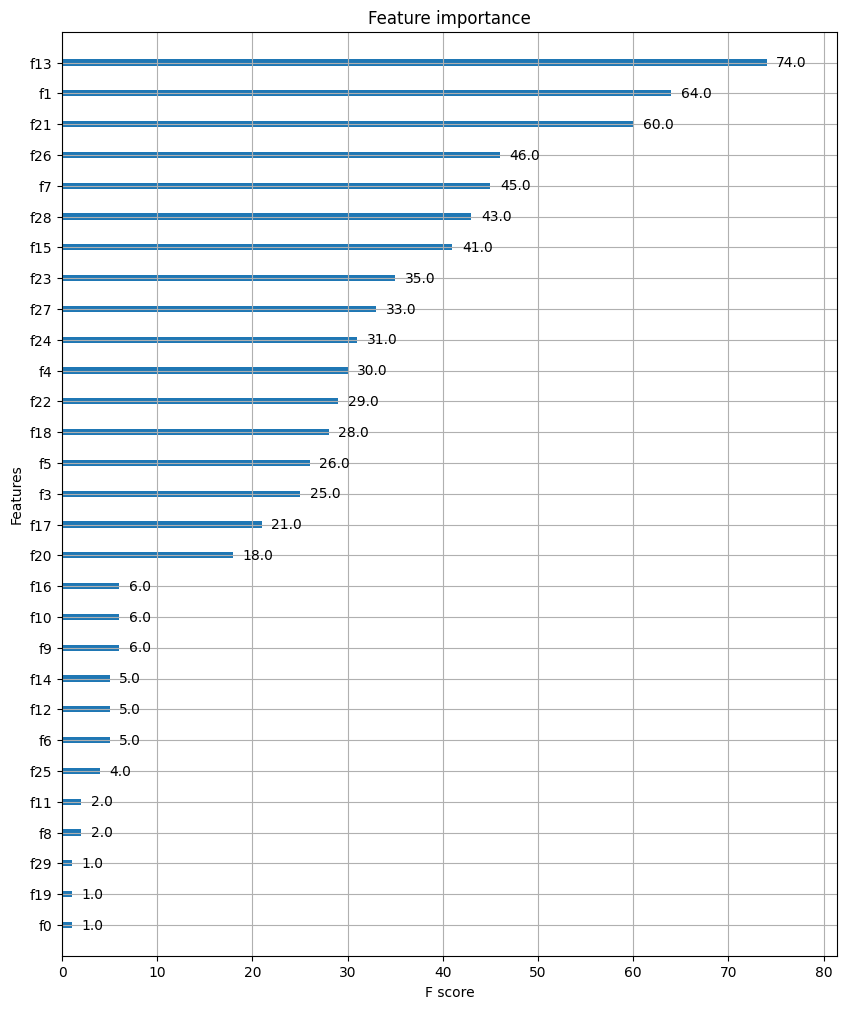

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)

* 결정 트리에서 보여준 트리 기반 규칙 구조도 xgboost에서 **to_graphviz()** API 이용해 시각화 가능
  + 파라미터로 학습이 완료된 모델 객체와 Graphviz가 참조할 파일명 입력
* 데이터 세트에 대한 교차 검증 수행 후 최적 파라미터를 구할 수 있는 방법을 **cv()** API로 제공(반환값은 DataFrame 형태)


```
xgboost.cv(params, dtrain, num_boost_round=10, nfold=3, stratified=False, folds=None, metrics=(), 
obj=None, feval=None, maximize=False, early_stopping_rounds=None, fpreproc=None, as_pandas=True, 
verbose_eval=None, show_stdv=True, seed=0, callbacks=None, shuffle=True)
```
* 파라미터
  + params (dict) : 부스터 파라미터
  + dtrain (DMatrix) : 학습 데이터
  + num_boost_round (int) : 부스팅 반복 횟수
  + nfold (int) : CV 폴드 개수
  + stratified (bool) : CV 수행 시 층화 표본 추출 수행 여부
  + metrics (string or list of strings) : CV 수행 시 모니터링할 서능 평가 지표
  + early_stopping_rounds (int) : 조기 중단을 활성화시킴. 반복 횟수 지정.

### 사이킷런 래퍼 XGBoost의 개요 및 적용

-사이킷런의 프레임워크와 연동하기 위해 사이킷런 전용의 XGBoost 래퍼 클래스 개발

분류를 위한 래퍼 클래스 **XGBClassifier**, 회귀를 위한 래퍼 클래스 **XGBRegressor**

* 변경된 네이티브 하이퍼 파라미터
  + eta -> learning rate
  + sub_sample -> subsample
  + lambda -> reg_lambda
  + alpha -> reg_alpha
  + n_estimators와 num_boost_round은 동일한 파라미터. 동시에 두 개가 사용되면 n_estimators 파라미터 적용. 
 (<->파이썬 래퍼 XGBoost는 num_boost_round 적용)

* 분류를 위한 래퍼 클래스인 XGBClassifier 이용해 위스콘신 대학병원의 유방암 데이터 세트 예측

In [ ]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

* get_clf_eval() 이용해 모델 예측 성능 평가

In [ ]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870,  F1: 0.9806, AUC:0.9951


* 조기 중단 수행 가능 - 조기 중단 관련 파라미터를 fit()에 입력
  + early_stopping_rounds : 평가 지표가 향상될 수 있는 반복 횟수
  + eval_metric : 조기 중단을 위한 평가 지표
  + eval_set : 성능 평가 수행할 데이터 세트(학습 데이터가 아닌 별도의 데이터 세트)

* 테스트 데이터 세트는 학습 시에는 완전히 알려지지 않은 데이터 세트 사용해야해

In [ ]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals=[(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)
ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15472
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

=> 400번 반복 수행하지 않고 311번 반복 후 학습 완료.

=> 211번 반복 시 logloss 0.085593, 311번 반복 시 logloss 0.085948. early_stopping_round로 지정된 100번 반복 동안 성능 평가 지수가 향상x

In [ ]:
get_clf_eval(y_test, ws100_preds, ws100_pred_proba)

오차 행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870,  F1: 0.9744, AUC:0.9954


* 조기 중단값을 너무 급격하게 줄이면 아직 성능이 향상될 여지가 있음에도 불구하고 반복 멈춰버려 예측 성능 저하될 우려o

In [ ]:
# early_stopping_rounds를 10으로 설정하고 재 학습.
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=evals, verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]
get_clf_eval(y_test, ws10_preds, ws10_pred_proba)

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15472
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

=> 62번 반복 logloss 0.090311, 52번 반복 logloss 0.089577. 10번의 반복 동안 성능 평가 지수 향상되지 못해 반복 수행하지 않고 학습 종료

=> 정확도 약 0.9561. early_stopping_rounds=100일 떄의 약 0.9649보다 낮아

* 피처 중요도 plot_importance() 이용해 시각화

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

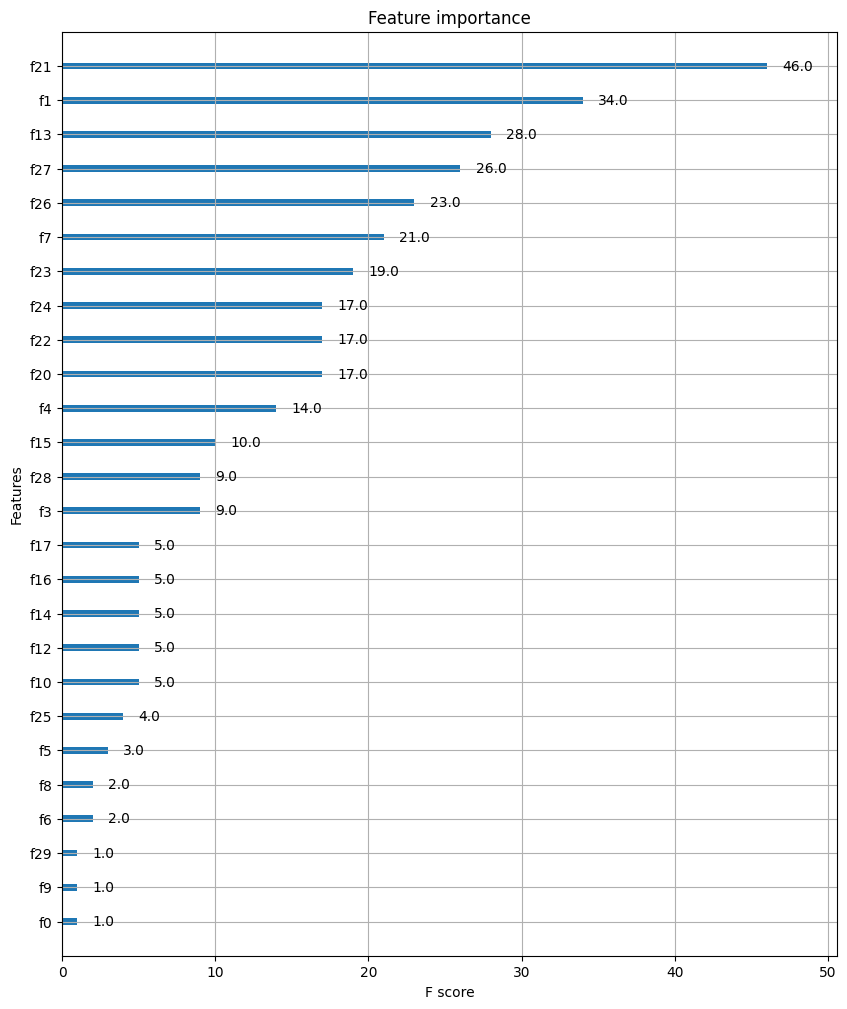

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
# 사이킷런 Wrapper 클래스를 입력해도 무방.
plot_importance(xgb_wrapper, ax=ax)

## 07. LightGBM



---


**LightGBM** : XGBoost와 함께 부스팅 계열 알고리즘에서 가장 각광.

(장점) 

-더 빠른 학습과 예측 수행 시간.

-더 작은 메모리 사용량

-카테고리형 피처의 자동 변환과 최적 분할

-대용량 데이터에 대한 뛰어난 예측 성능 및 병렬 컴퓨팅 기능 제공 + GPU까지 지원

(단점) 

-적은 데이터 세트에 적용할 경우 과적합 발생 쉬워(일반적으로 10000건 이하의 데이터 세트 정도)


* 리프 중심 트리 분할 방식 사용 

   : 트리의 균형 맞추지 않고, 최대 손실 값을 가지는 리프 노드를 지속적으로 분할 -> 트리 깊이 깊어지고 비대칭적인 규칙 트리 생성 -> 예측 오류 손실 최소화


* LightGBM의 파이썬 패키지 **lightgbm**(파이썬, 사이킷런 래퍼용 모두 존재)
   + 사이킷런 래퍼 LightGBM 클래스 : 분류를 위한 LGBMClassifier클래스 + 회귀를 위한 LGBMRegressor클래스


### LightGBM 하이퍼 파라미터

XGBoost와 많은 부분 유사 but 리프 중심 트리 특성에 맞는 하이퍼 파라미터 설정 필요(<- 분할되면서 트리의 깊이 깊어지므로)

>1) 주요 파라미터
* num_iterations [default=100] : 반복 수행하려는 트리의 개수 지정. 크게 지정할수록 예측 성능 높아지나, 너무 크게 지정하면 오히려 과적합으로 성능 저하.
* learning_rate [default=0.1] : 0에서 1 사이의 값 지정. 부스팅 스텝을 반복적으로 수행할 때 업데이트되는 학습률 값.
  + 일반적으로 n_estimators를 크게 하고 learning_rate를 작게 해서 예측 성능 향상시킬 수 있으나, 과적합 이슈와 학습 시간 길어지는 부정적인 영향도 고려.
  + GBM, XGBoost의 learning rate와 같은 파라미터
* max_depth [default=-1] : 트리 기반 알고리즘의 max_depth과 동일. 0보다 작은 값을 지정하면 깊이 제한x
  + LightBGM은 리프 중심 기반이므로 깊이가 상대적으로 더 깊다
* min_data_in_leaf [default=20] : 결정 트리의 min_samples_leaf와 같은 파라미터.
  + LightGBMClassifier에서는 min_child_samples 파라미터로 이름 변경
  + 최종 결정 클래스인 리프 노드가 되기 위해서 최소한으로 필요한 레코드 수. 과적합 제어하기 위한 파라미터.
* num_leaves [default=31] : 하나의 트리가 가질 수 있는 최대 리프 개수
* boosting [default=gbdt] : 부스팅의 트리를 생성하는 알고리즘 기술
  + gbdt : 일반적인 그래디언트 부스팅 결정 트리
  + rf : 랜덤 포레스트
* bagging_fraction [default=1.0] : 트리가 커져서 과적합되는 것을 제어하기 위해서 데이터를 샘플링하는 비율 지정
* feature_fraction [default=1.0] : 개별 트리를 학습할 때마다 무작위로 선택하는 피처의 비율. 과적합 막기 위해 사용
* lambda_l2 [default=0.0] : L2 regulation 제어를 위한 값.
  + 피처 개수가 많을 경우 적용을 검토하며 값이 클수록 과적합 감소 효과
* lambda_l1 [default=0.0] : L1 regulation 제어를 위한 값. 과적합 제어 위한 것.

>2) Learning Task 파라미터
* objective : 최솟값을 가져야 할 손실함수 정의. Xgboost의 objective 파라미터와 동일.
  + 애플리케이션 유형, 즉 회귀, 다중 클래스 분류, 이진 분류인지에 따라서 objective인 손실함수 지정

### 하이퍼 파라미터 튜닝 방안

* num_leaves의 개수를 중심으로 min_child_samples(min_data_in_leaf), max_depth 함께 조정하면서 모델의 복잡도 줄이는 것
  + num_leaves : 개별 트리가 가질 수 있는 최대 리프의 개수. LightGBM 모델의 복잡도 제어하는 주요 파라미터.
    - 일반적으로 num_leaves 개수 높이면 정확도 높아져 but 반대로 트리의 깊이 깊어지고 모델 복잡도 커져 과적합 영향도 커져
  + min_data_in_leaf : 사이킷런 래퍼 클래스에서는 min_child_samples. 과적합 개선하기 위한 중요 파라미터.
    - num_leaves와 학습 데이터의 크기에 따라 달라지지만, 보통 큰 값으로 설정하면 트리 깊어지는 것 방지.
   + max_depth : 명시적으로 깊이의 크기 제한. 과적합 개선.

* learning_rate 작게 하면서 n_estimators 크게 하는 것
* 과적합 제어 위해 reg_lambda, reg_alpha와 같은 regularization 적용
* 학습 데이터에 사용할 피처의 개수나 데이터 샘플링 레코드 개수 줄이기 위해 colsample_bytree, subsample 파라미터 적용

### 파이썬 래퍼 LightGBM과 사이킷런 래퍼 XGBoost, LightGBM 하이퍼 파라미터 비교

사이킷런 래퍼 LightGBM 클래스와 사이킷런 래퍼 XGBoost 클래스는 많은 하이퍼 파라미터가 똑같다

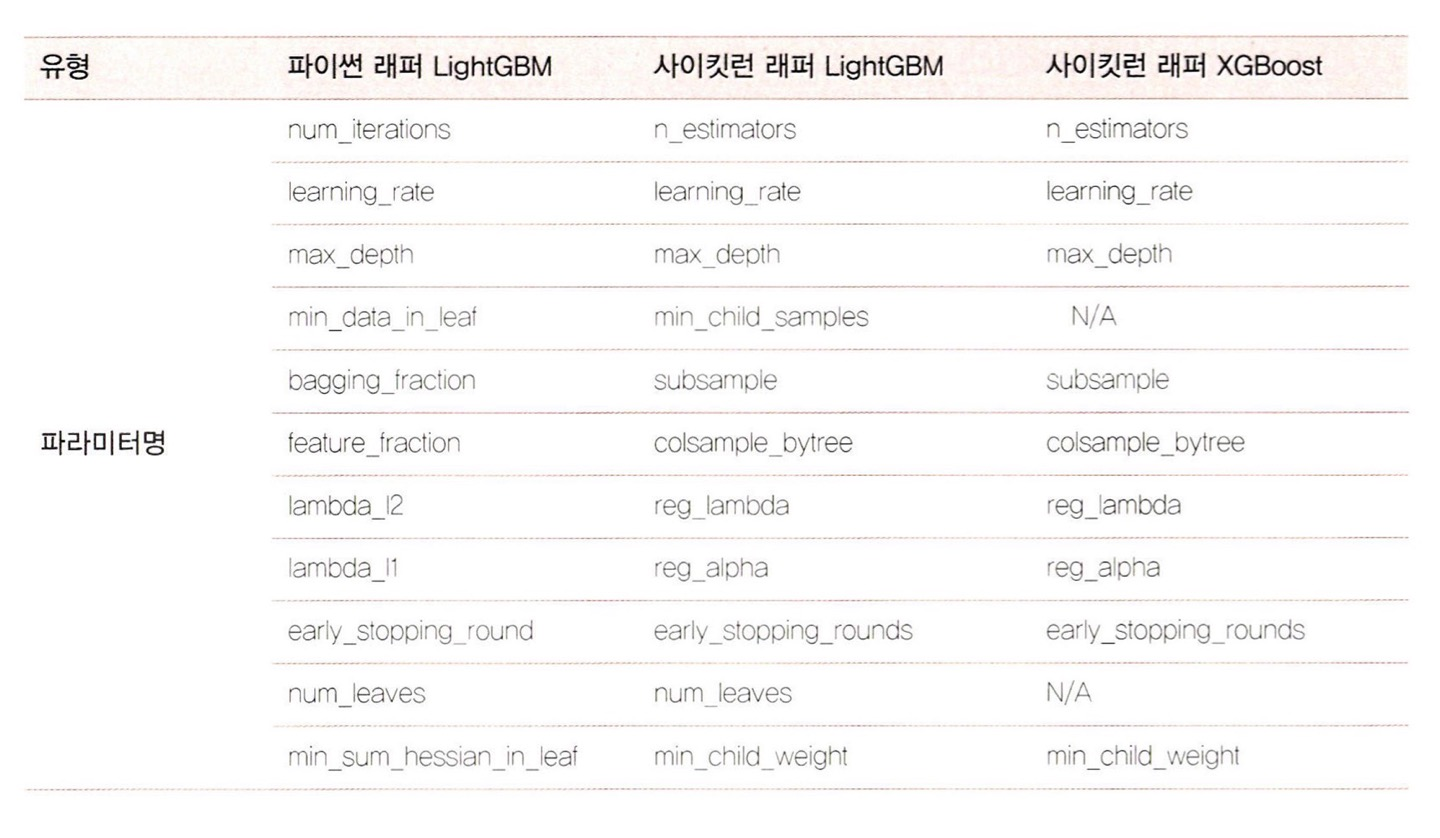

### LigthGBM 적용 - 위스콘신 유방암 예측



In [ ]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
ftr = dataset.data
target = dataset.target

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test , y_train, y_test = train_test_split(ftr, target, test_size=0.2, random_state=156)

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정.
lgbm_wrapper = LGBMClassifier(n_estimators=400)

# LigthGBM도 XGBoost와 동일하게 조기 중단 수행 가능.
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]

[1]	valid_0's binary_logloss: 0.565079
[2]	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355773
[7]	valid_0's binary_logloss: 0.329587
[8]	valid_0's binary_logloss: 0.308478
[9]	valid_0's binary_logloss: 0.285395
[10]	valid_0's binary_logloss: 0.267055
[11]	valid_0's binary_logloss: 0.252013
[12]	valid_0's binary_logloss: 0.237018
[13]	valid_0's binary_logloss: 0.224756
[14]	valid_0's binary_logloss: 0.213383
[15]	valid_0's binary_logloss: 0.203058
[16]	valid_0's binary_logloss: 0.194015
[17]	valid_0's binary_logloss: 0.186412
[18]	valid_0's binary_logloss: 0.179108
[19]	valid_0's binary_logloss: 0.174004
[20]	valid_0's binary_logloss: 0.167155
[21]	valid_0's binary_logloss: 0.162494
[22]	valid_0's binary_logloss: 0.156886
[23]	valid_0's binary_logloss: 0.152855
[24]	valid_0's binary_logloss: 0.151113
[25]	valid_0's binary_logloss: 0.148395
[26]	vali

=> 조기 중단으로 147번 반복까지만 수행하고 학습 종료

* LightGBM 모델 기반으로 예측 성능 평가 - get_clf_eval() 함수 이용

In [ ]:
get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[33  4]
 [ 1 76]]
정확도: 0.9561, 정밀도: 0.9500, 재현율: 0.9870,  F1: 0.9682, AUC:0.9905


=> 정확도가 약 94.74%

* 피처 중요도 시각화 - plot_importance()

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

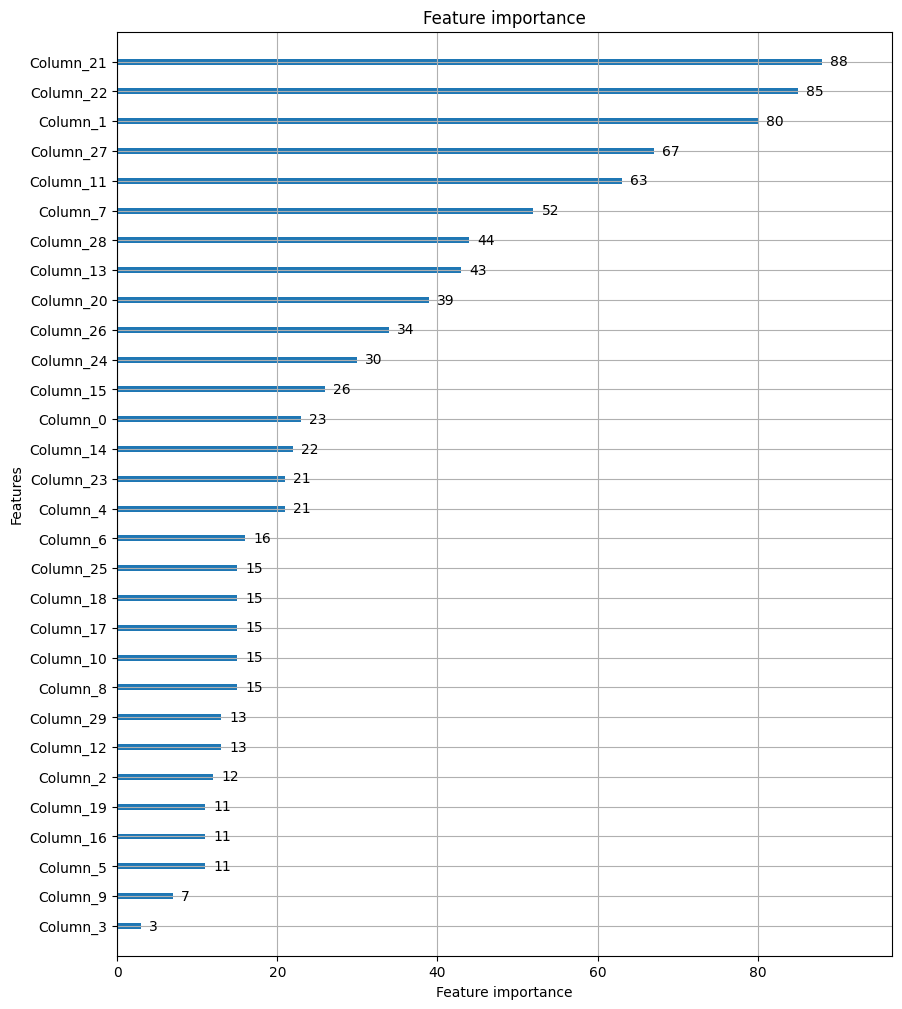

In [ ]:
# plot_importance()를 이용해 피처 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper, ax=ax)

## 10. 스태킹 앙상블



---


**스태킹(Stacking)** : 개별적인 여러 알고리즘으로 예측한 데이터를 기반으로 **다시** 예측 수행

=> 개별 알고리즘의 예측 결과 데이터 세트를 최종적인 메타 데이터 세트로 만들어 별도의 ML 알고리즘으로 최종 학습을 수행하고 테스트 데이터를 기반으로 다시 최종 예측 수행하는 방식(메타 모델)

* 개별적인 기반 모델 + 최종 메타 모델 필요
  + 여러 개별 모델의 예측 데이터를 각각 스태킹 형태로 결합해 최종 메타 모델의 학습용 피처 데이터 세트와 테스트용 피처 데이터 세트 만드는 것

* 많은 개별 모델 필요. 일반적으로 성능이 비슷한 모델을 결합해 좀 더 나은 성능 향상 도출하기 위해 적용

* 여러 개의 모델에 대한 예측값을 합한 후, 즉 스태킹 형태로 쌓은 뒤 이에 대한 예측을 다시 수행하는 것

* 스태킹 앙상블 모델

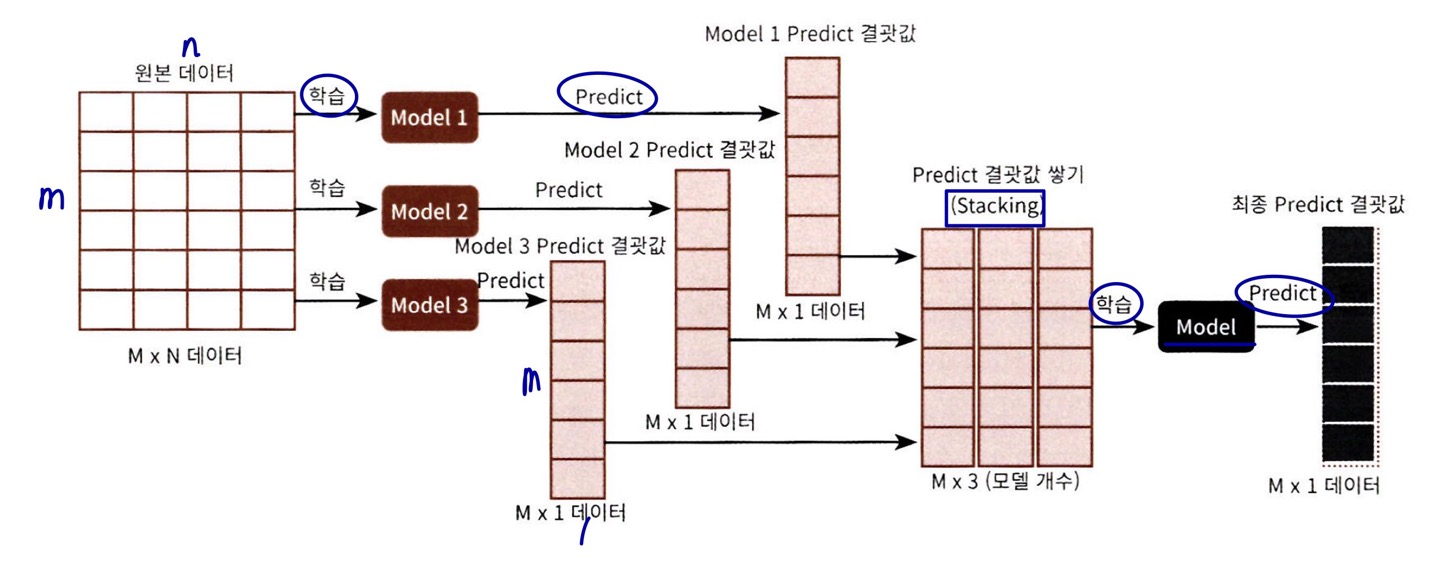

### 기본 스태킹 모델

* 데이터 다시 로딩. 학습 데이터 세트와 테스트 데이터 세트 나누기

In [ ]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer_data = load_breast_cancer()

X_data = cancer_data.data
y_label = cancer_data.target

X_train, X_test, y_train, y_test = train_test_split(X_data, y_label, test_size=0.2, random_state=0)

* 스태킹에 사용될 머신러닝 알고리즘 클래스 생성. 개별 모델은 KNN, 랜덤 포레스트, 결정 트리, 에이다부스트. -> 최종 모델은 로지스틱 회귀

In [ ]:
# 개별 ML 모델 생성
knn_clf = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

# 스태킹으로 만들어진 데이터 세트를 학습, 예측할 최종 모델
lr_final = LogisticRegression(C=10)

* 개별 모델 학습

In [ ]:
# 개별 모델들을 학습.
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

* 개별 모델의 예측 데이터 세트 반환. 각 모델의 예측 정확도.

In [ ]:
# 학습된 개별 모델들이 각자 반환하는 예측 데이터 세트를 생성하고 개별 모델의 정확도 측정.
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

print('KNN 정확도: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('결정 트리 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('에이다부스트 정확도: {0:.4f}'.format(accuracy_score(y_test, ada_pred)))

KNN 정확도: 0.9211
랜덤 포레스트 정확도: 0.9649
결정 트리 정확도: 0.9123
에이다부스트 정확도: 0.9561


* 개별 알고리즘으로부터 예측된 예측값을 칼럼 레벨로 옆으로 붙여서 피처 값을 만들어, 최종 메타 모델인 로지스틱 회귀에서 학습 데이터로 다시 사용
  + 반환된 예측 데이터 세트는 1차원 형태의 ndarray -> 먼저 반환된 예측 결과를 행 형태로 붙인 뒤, 넘파이의 transpose()를 이용해 행과 열 위치를 바꾼 ndarray로 변환

In [ ]:
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)

# transpose를 이용해 행과 열의 위치 교환. 칼럼 레벨로 각 알고리즘의 예측 결과를 피처로 만듦.
pred = np.transpose(pred)
print(pred.shape)

(4, 114)
(114, 4)


* 예측 데이터로 생성된 데이터 세트를 기반으로 최종 메타 모델인 로지스틱 회귀 학습. 예측 정확도 측정.

In [ ]:
lr_final.fit(pred, y_test)
final = lr_final.predict(pred)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, final)))

최종 메타 모델의 예측 정확도: 0.9737


=> 정확도가 97.37%로 개별 모델 정확도보다 향상

### CV 세트 기반의 스태킹

과적합을 개선하기 위해 최종 메타 모델을 위한 데이터 세트를 만들 때 교차 검증 기반으로 예측된 결과 데이터 세트 이용

-> 개별 모델들이 각각 교차 검증으로 메타 모델을 위한 학습용 스태킹 데이터 생성과 예측을 위한 테스트용 스태킹 데이터 생성한 뒤 이를 기반으로 메타 모델이 학습과 예측 수행

* 스텝 1 : 각 모델별로 원본 학습/테스트 데이터를 예측한 결과 값을 기반으로 메타 모델을 위한 학습용/테스트용 데이터 생성
* 스텝 2 : 스텝 1에서 개별 모델들이 생성한 학습용/테스트용 데이터를 모두 스태킹 형태로 합쳐서 메타 모델이 학습/예측할 최종 학습용/테스트 데이터 세트 생성 -> 최종적으로 생성된 학습 데이터 세트와 원본 학습 데이터의 레이블 데이터 기반으로 학습 -> 최종적으로 생성된 테스트 데이터 세트 예측 -> 원본 테스트 데이터의 레이블 데이터 기반으로 평가


- 스텝1의 첫 번째 반복(이를 3번(폴드개수) 반복)
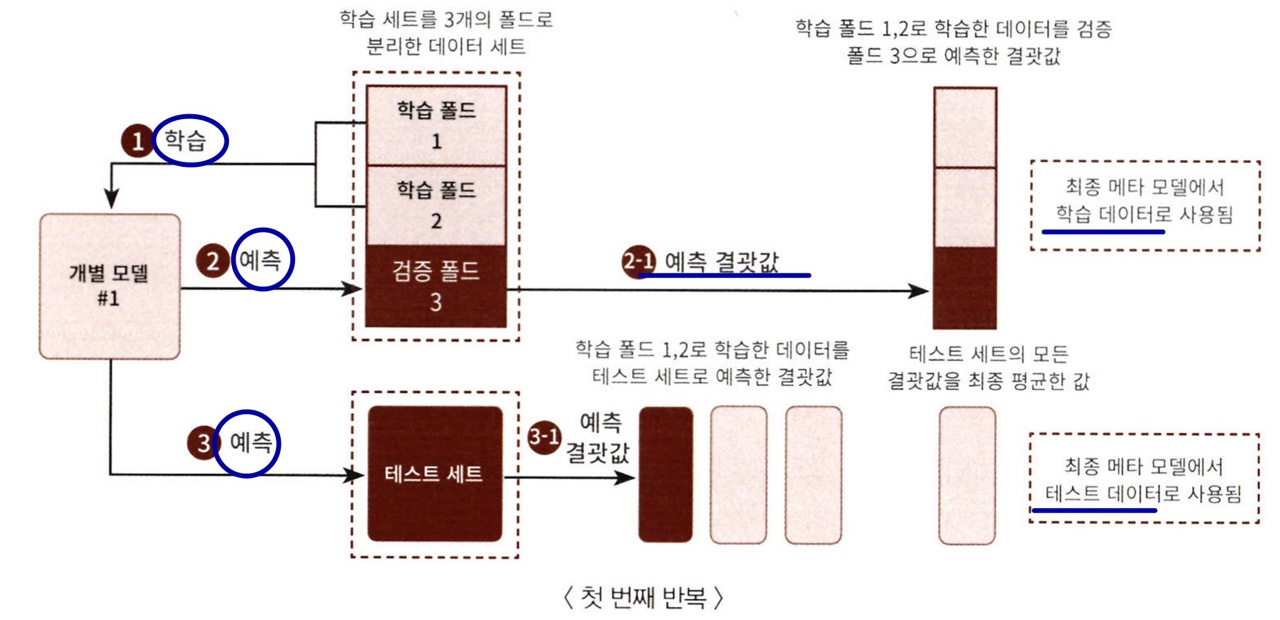

* 스텝 1 : 개별 모델이 메타 모델을 위한 학습용 데이터와 테스트 데이터 생성
  + 입력 파라미터 : 개별 모델의 Classifier 객체, 원본인 학습용 피처 데이터, 원본인 학습용 레이블 데이터, 원본인 테스트 피처 데이터, K 폴드를 몇 개로 할지
  + 폴드의 개수만큼 반복 수행 -> 폴드된 학습용 데이터로 학습 -> 예측 결괏값을 기반으로 메타 모델을 위한 학습용 데이터와 테스트용 데이터 새롭게 생성

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수.
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
  # 지정된 n_folds 값으로 KFold 생성.
  kf = KFold(n_splits=n_folds, shuffle=False)
  # 추후에 메타 모델이 학습할 학습 데이터 반환을 위한 넘파이 배열 초기화
  train_fold_pred = np.zeros((X_train_n.shape[0],1))
  test_pred = np.zeros((X_test_n.shape[0],n_folds))
  print(model.__class__.__name__,' model 시작 ')

  for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
    # 입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 세트 추출
    print('\t 폴드 세트: ', folder_counter, ' 시작 ')
    X_tr = X_train_n[train_index]
    y_tr = y_train_n[train_index]
    X_te = X_train_n[valid_index]

    # 폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
    model.fit(X_tr, y_tr)
    # 폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
    train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
    # 입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장.
    test_pred[:, folder_counter] = model.predict(X_test_n)

  # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
  test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)

  # train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
  return train_fold_pred, test_pred_mean

* 각 모델별로 get_stacking_base_datasets()함수 호출해 각각 메타 모델이 사용할 학습용, 테스트용 데이터 세트 반환
  + 개별 모델은 KNN, 랜덤 포레스트, 결정 트리, 에이다부스트 모델

In [ ]:
knn_train, knn_test = get_stacking_base_datasets(knn_clf, X_train, y_train, X_test, 7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, X_train, y_train, X_test, 7)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, X_train, y_train, X_test, 7)
ada_train, ada_test = get_stacking_base_datasets(ada_clf, X_train, y_train, X_test, 7)

KNeighborsClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
RandomForestClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
DecisionTreeClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
AdaBoostClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 


* 스텝 2 : 각 모델별 학습 데이터와 테스트 데이터 합치기(넘파이의 concatenate())

In [ ]:
Stack_final_X_train = np.concatenate((knn_train, rf_train, dt_train, ada_train), axis=1)
Stack_final_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test), axis=1)
print('원본 학습 피처 데이터 Shape:',X_train.shape, '원본 테스트 피처 Shape:',X_test.shape)
print('스태킹 학습 피처 데이터 Shape:',Stack_final_X_train.shape,
      '스태킹 테스트 피어 데이터 Shape:',Stack_final_X_test.shape)

원본 학습 피처 데이터 Shape: (455, 30) 원본 테스트 피처 Shape: (114, 30)
스태킹 학습 피처 데이터 Shape: (455, 4) 스태킹 테스트 피어 데이터 Shape: (114, 4)


=> Stack_final_X_train : 메타 모델이 학습할 학습용 피처 데이터 세트, Stack_final_X_test : 메타 모델이 예측할 테스트용 피어 데이터 세트

=> 스태킹 학습 피처 데이터는 원본 학습 피처 데이터와 로우 크기는 같으며, 4개의 개별 모델 예측값 합친 것이므로 칼럼 크기는 4

* 최종 메타 모델인 로지스틱 회귀를 스태킹된 학습용 피처 데이터 세트와 원본 학습 레이블 데이터로 학습 -> 스태킹된 테스트 데이터 세트로 예측 -> 예측 결과를 원본 테스트 레이블 데이터와 비교해 정확도 측정

In [ ]:
lr_final.fit(Stack_final_X_train, y_train)
stack_final = lr_final.predict(Stack_final_X_test)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, stack_final)))

최종 메타 모델의 예측 정확도: 0.9737


=> 최종 메타 모델의 예측 정확도 : 약 97.37%

=> 개별 알고리즘 모델의 파라미터를 최적으로 튜닝한 상태에서 스태킹 모델 만드는 것이 일반적

## 11. 정리



---

**앙상블** : 결정 트리 기반의 다수의 약한 학습기를 결합해 변동성을 줄여 예측 오류 줄이고 성능 개선
* 배깅 : 학습 데이터를 중복 허용하면서 다수의 세트로 샘플링하여 이를 다수의 약한 학습기가 학습한 뒤 최종 결과 결합해 예측
  + 대표적 : 랜덤 포레스트 (수행시간 빠르고 비교적 안정적인 예측 성능)
* 부스팅 : 학습기들이 순차적으로 학습 진행하면서 예측 틀린 데이터에 대해서는 가중치 부여해 다음번 학습기가 학습할 때 이전에 예측이 틀린 데이터에 대해서는 보다 높은 정확도로 예측할 수 있도록
  + 대표적 : GBM(Gradient Boosting Machine) (뛰어난 예측 성능, 수행 시간 너무 오래 걸려)
* XGBoost와 LightGBM : 현재 가장 각광. 빠른 수행 시간+예측 성능
* 스태킹 : 여러 개의 개별 모델들이 생성한 예측 데이터를 기반으로 최종 메타 모델이 학습할 별도의 학습 데이터 세트와 예측할 테스트 데이터 세트 재생성(스태킹 형태로 결합)